In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
df = pd.read_csv('Irisdataset.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [46]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Label Encoding

In [47]:

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [49]:
species_name= le.classes_
species_name

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [50]:
X = df.drop(columns=['Id', 'Species'])
y = df['Species']
X.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


Splitting the data into training and testing

In [51]:

print(y[:5])

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64


In [52]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

In [53]:

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)


(105, 4) (45, 4)
(105,) (45,)


Scaling the data

In [54]:
sc= StandardScaler()
print(x_train[:2])
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train[:2])

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
57             4.9           2.4            3.3           1.0
142            5.8           2.7            5.1           1.9
[[-1.14630942 -1.44374444 -0.25650655 -0.258263  ]
 [-0.03754545 -0.73865995  0.7974008   0.98061283]]


In [55]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
print(y_train[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [56]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [58]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[-1], )))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

In [59]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                160       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
model.fit(x_train, y_train, epochs=100, verbose=2)

Epoch 1/100
4/4 - 1s - loss: 1.2351 - accuracy: 0.2476 - 1s/epoch - 365ms/step
Epoch 2/100
4/4 - 0s - loss: 1.1578 - accuracy: 0.3333 - 51ms/epoch - 13ms/step
Epoch 3/100
4/4 - 0s - loss: 1.1276 - accuracy: 0.3810 - 31ms/epoch - 8ms/step
Epoch 4/100
4/4 - 0s - loss: 1.0270 - accuracy: 0.4762 - 31ms/epoch - 8ms/step
Epoch 5/100
4/4 - 0s - loss: 1.0082 - accuracy: 0.4857 - 28ms/epoch - 7ms/step
Epoch 6/100
4/4 - 0s - loss: 1.0022 - accuracy: 0.5524 - 20ms/epoch - 5ms/step
Epoch 7/100
4/4 - 0s - loss: 0.9269 - accuracy: 0.5905 - 16ms/epoch - 4ms/step
Epoch 8/100
4/4 - 0s - loss: 0.9151 - accuracy: 0.5905 - 20ms/epoch - 5ms/step
Epoch 9/100
4/4 - 0s - loss: 0.8586 - accuracy: 0.6000 - 25ms/epoch - 6ms/step
Epoch 10/100
4/4 - 0s - loss: 0.8394 - accuracy: 0.6095 - 32ms/epoch - 8ms/step
Epoch 11/100
4/4 - 0s - loss: 0.8262 - accuracy: 0.6667 - 21ms/epoch - 5ms/step
Epoch 12/100
4/4 - 0s - loss: 0.7779 - accuracy: 0.7048 - 18ms/epoch - 5ms/step
Epoch 13/100
4/4 - 0s - loss: 0.7509 - accuracy:

In [61]:
prediction = model.predict(x_test)
print(prediction[:5])

2/2 [==============================] - 0s 13ms/step
[[9.9996585e-01 3.2847660e-05 1.1832484e-06]
 [1.6298348e-02 8.6104244e-01 1.2265921e-01]
 [9.9971676e-01 2.7665021e-04 6.6533876e-06]
 [2.6524931e-03 4.6829201e-02 9.5051825e-01]
 [9.9968708e-01 2.9984390e-04 1.3088276e-05]]


In [62]:
prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])

[0 1 0 2 0]


In [63]:

print(y_test[:5])

4      0
58     1
20     0
114    2
31     0
Name: Species, dtype: int64


In [64]:

from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, prediction))

0.9777777777777777


In [65]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[16  0  0]
 [ 0 12  0]
 [ 0  1 16]]


Text(50.72222222222221, 0.5, 'actual')

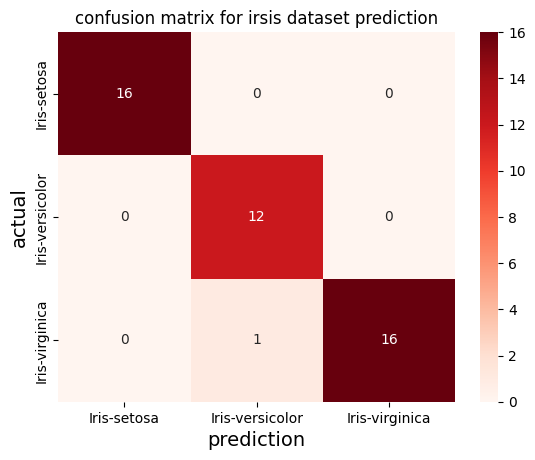

In [66]:

ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('confusion matrix for irsis dataset prediction')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual', fontsize=14)